# DATA3406 W10 Mini Assignment

####Data Exploration

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [11]:
# Investigating the C4 Ratings data by importing it
df = pd.read_excel('/C4Ratings.xlsx', index_col=0)

# View the first five rows to see what variables are in the data and visualise the values under each variable
df.head()

,CourseID,Timestamp,User,QuestionID,Difficulty,Score
RatingID,,,,,,
46144026,21320,2020-04-30 19:57:37,635978,4470201,0,3
46144058,21320,2020-04-30 20:00:56,635978,4468999,1,3
46162555,21320,2020-05-01 15:43:46,636026,4471345,1,5
46188219,21320,2020-05-03 13:29:05,635990,4472540,1,4
46188241,21320,2020-05-03 13:35:05,635990,4472481,1,3


In [7]:
# Print the data types of each variable
df.dtypes

We can see that the variables in the C4 Ratings dataset are all integers except for the Timestamp variable, which is a python object


In [12]:
print('We can see that the variables in the C4 Ratings dataset are all integers except for the Timestamp variable, which is a python object')
print('There are {} rows in the ratings data set'.format(df.shape[0]))
print('There are {} unique questionID'.format(df['QuestionID'].nunique()))

We can see that the variables in the C4 Ratings dataset are all integers except for the Timestamp variable, which is a python object
There are 2233 rows in the ratings data set
There are 501 unique ratingID


####Summarise Ratings Data

In [13]:
# Identify the value range for difficulty
df['Difficulty'].nunique()

3

In [14]:
print('The number of levels in difficulty are 3')

The number of levels in difficulty are 3


In [ ]:
# Identify the value range for score
df['Score'].nunique()

6

In [15]:
print('The number of levels in score are 6')

The number of levels in score are 6


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff8cc4ed9e8>]],
      dtype=object)

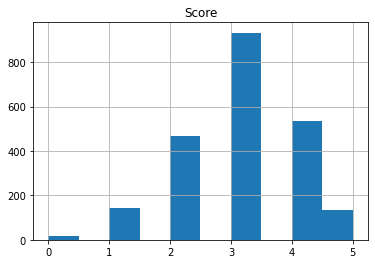

In [ ]:
# Plot a histogram of the scores column to see the distribution of score values across all questions
df.hist('Score')

Figure 1: See that the mode of the dataset is a score of 3.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff8cc8a14a8>]],
      dtype=object)

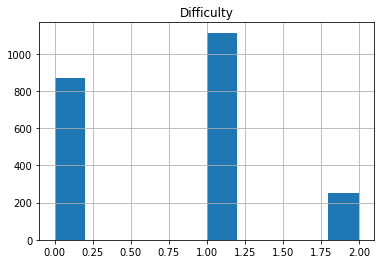

In [ ]:
# Plot a histogram of the difficulty column to see the distribution of difficulty values across all questions
df.hist('Difficulty')

Figure 2: See that the mode of the dataset is a difficulty of 1.

####Ratings Overview



*  We have 2233 rows in the dataset
*  There are 501 questions
*  Each row has a ratingID that corresponde to a questionID
*  The dataset also contains the courseID, timestamp, difficulty and score. As well as, the user who made the rating.





#### Import UserCourses and Tags Data

In [21]:
# Investigating the C4 Tags data by importing it
df2 = pd.read_excel('/C4Tags.xlsx', index_col=0)

# Investigating the C4 UsersCourses data by importing it
df3 = pd.read_excel('/C4UsersCourses.xlsx', index_col=0)

####Driving Question

The driving question is, what are the impacts of the group membership for performance using PeerWise?

In [22]:
# Try to merge the Ratings and Tags datasets using a left join, according to Question ID
df12 = pd.merge(df, df2, on='QuestionID',how='left')

In [23]:
# Convert Tag from data type object to string
df12['Tag'] = df12['Tag'].astype('str') 

# Remove the tag rows that have the duplicate assigned team number too
df12 = df12[~df12.Tag.str.contains(r'\d')]

# Remove NaN
df12.dropna(how='any', inplace=True)

# Print the first 5 rows to visualise what variables are in the merged dataset
df12.head()

,CourseID,Timestamp,User,QuestionID,Difficulty,Score,Tag,TagID
0,21320,2020-04-30 19:57:37,635978,4470201,0,3,Pink,6409737.0
3,21320,2020-04-30 20:00:56,635978,4468999,1,3,Pink,6408243.0
4,21320,2020-05-01 15:43:46,636026,4471345,1,5,Red,6411169.0
7,21320,2020-05-03 13:29:05,635990,4472540,1,4,Brown,6413019.0
9,21320,2020-05-03 13:35:05,635990,4472481,1,3,Brown,6412917.0


How many different sudents are in the merged dataset?

In [24]:
print('There are {} unique students in the merged dataset'.format(df12['User'].nunique()))

There are 243 unique students in the merged dataset


What is the date range of the data?

In [26]:
# Calculate the minimum date in the merged dataset
oldest = pd.to_datetime(df12['Timestamp'].min())

# Calculate the maximum date in the merged dataset
newest = pd.to_datetime(df12['Timestamp'].max())

# While printing, calculating the oldest - newest to find the date range of the dataset
print('The oldest date is {} and the newest date is {}'.format(oldest,newest))
print('This is a date range of {}'.format((newest-oldest)))

The oldest date is 2020-04-28 21:23:18 and the newest date is 2020-05-19 12:27:03
This is a date range of 20 days 15:03:45


What is the median score for each group? 

In [28]:
# Group by team colour (tag) and calculate the median score for each
df12.groupby('Tag')['Score'].mean().sort_values()

Tag
Black     2.844697
Brown     2.871560
Red       2.962209
Pink      2.975758
Blue      3.039007
Green     3.048701
Yellow    3.070796
Purple    3.083333
White     3.157895
Name: Score, dtype: float64

In [27]:
print('We can see that the black group had the lowest median score and white had the highest median score')

We can see that the black group had the lowest median score and white had the highest median score


In [31]:
# Plot a boxplot of tag vs. score. A boxplot was chosen because it helps visualise the interquartile range and any outliers.
px.box(df12, x="Tag", y="Score")

Figure 3: Boxplot comparing each group. We can visually see that black has a lower interquartile range in comparison to all the other groups. Similarly, all groups have amedian near 3. There are outliers for the black, blue and yellow groups.

What is the median difficulty for each group?

In [29]:
# Group by team colour (tag) and calculate the median difficulty for each
df12.groupby('Tag')['Difficulty'].mean().sort_values()

Tag
White     0.660819
Green     0.662338
Red       0.683140
Purple    0.690476
Black     0.693182
Pink      0.724242
Blue      0.741135
Brown     0.752294
Yellow    0.893805
Name: Difficulty, dtype: float64

In [32]:
print('We can see that the white group had the lowest median difficulty rating and yellow had the highest median difficulty rating')

We can see that the white group had the lowest median difficulty rating and yellow had the highest median difficulty rating


In [33]:
# Plot a boxplot of tag vs. score. A boxplot was chosen because it helps visualise the interquartile range and any outliers.
px.box(df12, x="Tag", y="Difficulty")

Figure 4: From the boxplot, we can see that there is not a distinct variation between groups for difficulty rating. Hence, there may be no further investigation into difficulty.

How many questions were rated by each team ?

In [38]:
# Group by team colour and count how many rating were made
df12.groupby(['Tag'])['QuestionID'].count().sort_values()

Tag
Purple     84
White     171
Brown     218
Yellow    226
Black     264
Blue      282
Green     308
Pink      330
Red       344
Name: QuestionID, dtype: int64

In [34]:
print('We can see that the purple group had the lowest number of questions rated and red had the highest number of questions rated')

We can see that the black group had the lowest number of questions rated and yellow had the highest number of questions rated


In [37]:
# Plot a boxplot of tag vs. score. A boxplot was chosen because it helps visualise the interquartile range and any outliers.
px.histogram(df12, x="Tag", y="QuestionID")

Figure 5: The histogram looks at the number of questions rated per group. We can see that the purple group had the lowest number of questions rated. Whilst, the red group had the highest number of questions rated near 350. The variation in number of questions may affect the groups exam outcome, which we will continue to investigate.